In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# to ignore the warnings
from warnings import filterwarnings

In [287]:
# Read in game scores data (same as verison1)
game_score_df = pd.read_excel('./data/apiGameScores.xlsx')
game_score_df.head()

,game_ids,date,visitor,home,visitor_points,home_points
0,319,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,1300,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,1344,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,1353,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,1376,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [288]:
# Read in game scores data (same as verison2)
game_statistics_df = pd.read_csv('./version3_mlFiles/gameStatisticsFinalDataFrame.csv')
game_statistics_df.head()

,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_team
0,88,29,77,0.377,16,23,0.696,14,46,0.304,...,0.294,16,30,46,20,20,10,10,5,New York Knicks
1,125,47,85,0.553,23,32,0.719,8,19,0.421,...,0.412,6,20,26,21,24,5,5,3,Dallas Mavericks
2,106,38,96,0.396,19,21,0.905,11,41,0.268,...,0.382,2,40,42,26,16,7,14,6,Brooklyn Nets
3,102,39,81,0.481,17,24,0.708,7,21,0.333,...,0.342,15,35,50,20,18,9,21,5,Cleveland Cavaliers
4,104,36,83,0.434,22,26,0.846,10,34,0.294,...,0.370,15,37,52,21,22,6,14,6,Detroit Pistons


In [289]:
print(f"Shape of game score dataframe: {game_score_df.shape}")
print(f"Shape of game statistics dataframe: {game_statistics_df.shape}")

Shape of game score dataframe: (14242, 6)
Shape of game statistics dataframe: (2495, 39)


In [290]:
print(f"Look at game score columns: \n{game_score_df.columns}")
print("\n")
print(f"Look at game statistics columns: \n{game_statistics_df.columns}")

Look at game score columns: 
Index(['game_ids', 'date', 'visitor', 'home', 'visitor_points', 'home_points'], dtype='object')


Look at game statistics columns: 
Index(['visitor_points', 'visitor_fgm', 'visitor_fga', 'visitor_fgp',
       'visitor_ftm', 'visitor_fta', 'visitor_ftp', 'visitor_tpm',
       'visitor_tpa', 'visitor_tpp', 'visitor_offReb', 'visitor_defReb',
       'visitor_totReb', 'visitor_assists', 'visitor_pFouls', 'visitor_steals',
       'visitor_turnovers', 'visitor_blocks', 'game_id', 'visitor_team',
       'home_points', 'home_fgm', 'home_fga', 'home_fgp', 'home_ftm',
       'home_fta', 'home_ftp', 'home_tpm', 'home_tpa', 'home_tpp',
       'home_offReb', 'home_defReb', 'home_totReb', 'home_assists',
       'home_pFouls', 'home_steals', 'home_turnovers', 'home_blocks',
       'home_team'],
      dtype='object')


In [291]:
# Both Data Frames have a common id column.
# These will be used to merge both frames
merged_df = pd.merge(game_score_df, game_statistics_df, 
                     left_on=['game_ids'], 
                     right_on=['game_id'])
merged_df.head()

,game_ids,date,visitor,home,visitor_points_x,home_points_x,visitor_points_y,visitor_fgm,visitor_fga,visitor_fgp,...,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_team
0,12388,2023-04-21T23:00:00.000Z,Boston Celtics,Atlanta Hawks,122.0,130.0,130,51,91,0.560,...,0.438,6,23,29,31,17,11,12,0,Boston Celtics
1,12395,2023-04-23T23:00:00.000Z,Boston Celtics,Atlanta Hawks,129.0,121.0,121,43,98,0.439,...,0.400,9,40,49,25,23,4,16,5,Boston Celtics
2,12404,2023-04-28T00:30:00.000Z,Boston Celtics,Atlanta Hawks,128.0,120.0,120,44,94,0.468,...,0.429,11,36,47,24,16,7,7,10,Boston Celtics
3,13582,2024-03-25T23:30:00.000Z,Boston Celtics,Atlanta Hawks,118.0,120.0,120,46,87,0.529,...,0.289,12,26,38,21,16,7,9,8,Boston Celtics
4,13608,2024-03-28T23:30:00.000Z,Boston Celtics,Atlanta Hawks,122.0,123.0,123,51,104,0.490,...,0.389,9,34,43,28,15,7,12,6,Boston Celtics


In [292]:
print(f"Shape of game merged dataframe: {merged_df.shape}")

Shape of game merged dataframe: (2495, 45)


In [293]:
# Look at data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_ids           2495 non-null   int64  
 1   date               2495 non-null   object 
 2   visitor            2495 non-null   object 
 3   home               2495 non-null   object 
 4   visitor_points_x   2495 non-null   float64
 5   home_points_x      2495 non-null   float64
 6   visitor_points_y   2495 non-null   int64  
 7   visitor_fgm        2495 non-null   int64  
 8   visitor_fga        2495 non-null   int64  
 9   visitor_fgp        2495 non-null   float64
 10  visitor_ftm        2495 non-null   int64  
 11  visitor_fta        2495 non-null   int64  
 12  visitor_ftp        2495 non-null   float64
 13  visitor_tpm        2495 non-null   int64  
 14  visitor_tpa        2495 non-null   int64  
 15  visitor_tpp        2495 non-null   float64
 16  visitor_offReb     2495 

In [294]:
# Look at null values
merged_df.isnull().sum()

game_ids             0
date                 0
visitor              0
home                 0
visitor_points_x     0
home_points_x        0
visitor_points_y     0
visitor_fgm          0
visitor_fga          0
visitor_fgp          0
visitor_ftm          0
visitor_fta          0
visitor_ftp          0
visitor_tpm          0
visitor_tpa          0
visitor_tpp          0
visitor_offReb       0
visitor_defReb       0
visitor_totReb       0
visitor_assists      0
visitor_pFouls       0
visitor_steals       0
visitor_turnovers    0
visitor_blocks       0
game_id              0
visitor_team         0
home_points_y        0
home_fgm             0
home_fga             0
home_fgp             0
home_ftm             0
home_fta             0
home_ftp             0
home_tpm             0
home_tpa             0
home_tpp             0
home_offReb          0
home_defReb          0
home_totReb          0
home_assists         0
home_pFouls          0
home_steals          0
home_turnovers       0
home_blocks

In [295]:
merged_df.columns

Index(['game_ids', 'date', 'visitor', 'home', 'visitor_points_x',
       'home_points_x', 'visitor_points_y', 'visitor_fgm', 'visitor_fga',
       'visitor_fgp', 'visitor_ftm', 'visitor_fta', 'visitor_ftp',
       'visitor_tpm', 'visitor_tpa', 'visitor_tpp', 'visitor_offReb',
       'visitor_defReb', 'visitor_totReb', 'visitor_assists', 'visitor_pFouls',
       'visitor_steals', 'visitor_turnovers', 'visitor_blocks', 'game_id',
       'visitor_team', 'home_points_y', 'home_fgm', 'home_fga', 'home_fgp',
       'home_ftm', 'home_fta', 'home_ftp', 'home_tpm', 'home_tpa', 'home_tpp',
       'home_offReb', 'home_defReb', 'home_totReb', 'home_assists',
       'home_pFouls', 'home_steals', 'home_turnovers', 'home_blocks',
       'home_team'],
      dtype='object')

In [296]:
# Drop irrelevant columns 
merged_df = merged_df.drop(columns=['game_id', 'date', 'home_team', 'visitor_team', 'home_points_y', 'visitor_points_y'])

# Rename columns 'home_points_x' and 'visitor_points_x'
merged_df = merged_df.rename(columns={
    'home_points_x': 'home_points',
    'visitor_points_x': 'visitor_points'
})

# Display
merged_df

,game_ids,visitor,home,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,...,home_tpa,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks
0,12388,Boston Celtics,Atlanta Hawks,122.0,130.0,51,91,0.560,13,16,...,48,0.438,6,23,29,31,17,11,12,0
1,12395,Boston Celtics,Atlanta Hawks,129.0,121.0,43,98,0.439,21,24,...,40,0.400,9,40,49,25,23,4,16,5
2,12404,Boston Celtics,Atlanta Hawks,128.0,120.0,44,94,0.468,17,22,...,42,0.429,11,36,47,24,16,7,7,10
3,13582,Boston Celtics,Atlanta Hawks,118.0,120.0,46,87,0.529,10,17,...,38,0.289,12,26,38,21,16,7,9,8
4,13608,Boston Celtics,Atlanta Hawks,122.0,123.0,51,104,0.490,6,10,...,36,0.389,9,34,43,28,15,7,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,12964,Toronto Raptors,Washington Wizards,132.0,102.0,42,90,0.467,10,15,...,38,0.395,14,39,53,43,18,12,20,5
2491,13570,Toronto Raptors,Washington Wizards,109.0,112.0,44,92,0.478,13,19,...,33,0.242,13,29,42,27,20,9,12,7
2492,14072,Toronto Raptors,Washington Wizards,95.0,113.0,35,76,0.461,26,38,...,33,0.212,19,26,45,20,32,12,23,3
2493,13176,Utah Jazz,Washington Wizards,123.0,108.0,43,88,0.489,15,20,...,31,0.419,13,39,52,34,19,6,16,2


# Machine Learning Model 3 Version 1.1

In [297]:
# This will be Version 1.1 in which the whole Data Frame will be used
# Version 1.2 will ask the user for the away and home team. This will lead to less rows of data (games played by two teams)

# Drop 'game_ids' column
new_df = merged_df.drop(columns='game_ids', axis=1)
new_df.head()

,visitor,home,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,...,home_tpa,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks
0,Boston Celtics,Atlanta Hawks,122.0,130.0,51,91,0.560,13,16,0.813,...,48,0.438,6,23,29,31,17,11,12,0
1,Boston Celtics,Atlanta Hawks,129.0,121.0,43,98,0.439,21,24,0.875,...,40,0.400,9,40,49,25,23,4,16,5
2,Boston Celtics,Atlanta Hawks,128.0,120.0,44,94,0.468,17,22,0.773,...,42,0.429,11,36,47,24,16,7,7,10
3,Boston Celtics,Atlanta Hawks,118.0,120.0,46,87,0.529,10,17,0.588,...,38,0.289,12,26,38,21,16,7,9,8
4,Boston Celtics,Atlanta Hawks,122.0,123.0,51,104,0.490,6,10,0.600,...,36,0.389,9,34,43,28,15,7,12,6


In [298]:
# Apply one-hot encoding to categorical columns
encoded_df = pd.get_dummies(new_df, columns=['visitor', 'home']).copy()

# Apply transformation only to columns with dtype 'bool'
encoded_df.loc[:, encoded_df.dtypes == 'bool'] = encoded_df.loc[:, encoded_df.dtypes == 'bool'].astype(int)

# Display
encoded_df

C:\Users\User\AppData\Local\Temp\ipykernel_2300\1535553639.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  encoded_df.loc[:, encoded_df.dtypes == 'bool'] = encoded_df.loc[:, encoded_df.dtypes == 'bool'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_2300\1535553639.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  encoded_df.loc[:, encoded_df.dtypes == 'bool'] = encoded_df.loc[:, encoded_df.dtypes == 'bool'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_2300\1535553639.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' ha

,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,...,home_Oklahoma City Thunder,home_Orlando Magic,home_Philadelphia 76ers,home_Phoenix Suns,home_Portland Trail Blazers,home_Sacramento Kings,home_San Antonio Spurs,home_Toronto Raptors,home_Utah Jazz,home_Washington Wizards
0,122.0,130.0,51,91,0.560,13,16,0.813,15,34,...,0,0,0,0,0,0,0,0,0,0
1,129.0,121.0,43,98,0.439,21,24,0.875,14,37,...,0,0,0,0,0,0,0,0,0,0
2,128.0,120.0,44,94,0.468,17,22,0.773,15,35,...,0,0,0,0,0,0,0,0,0,0
3,118.0,120.0,46,87,0.529,10,17,0.588,18,36,...,0,0,0,0,0,0,0,0,0,0
4,122.0,123.0,51,104,0.490,6,10,0.600,15,44,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,132.0,102.0,42,90,0.467,10,15,0.667,8,33,...,0,0,0,0,0,0,0,0,0,1
2491,109.0,112.0,44,92,0.478,13,19,0.684,11,35,...,0,0,0,0,0,0,0,0,0,1
2492,95.0,113.0,35,76,0.461,26,38,0.684,17,43,...,0,0,0,0,0,0,0,0,0,1
2493,123.0,108.0,43,88,0.489,15,20,0.750,7,30,...,0,0,0,0,0,0,0,0,0,1


In [299]:
# Create a column to check if the home team won
encoded_df['home_win'] = encoded_df.apply(
    lambda row: 1 if row['home_points'] > row['visitor_points'] else 0,
    axis=1
)
encoded_df

,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,...,home_Orlando Magic,home_Philadelphia 76ers,home_Phoenix Suns,home_Portland Trail Blazers,home_Sacramento Kings,home_San Antonio Spurs,home_Toronto Raptors,home_Utah Jazz,home_Washington Wizards,home_win
0,122.0,130.0,51,91,0.560,13,16,0.813,15,34,...,0,0,0,0,0,0,0,0,0,1
1,129.0,121.0,43,98,0.439,21,24,0.875,14,37,...,0,0,0,0,0,0,0,0,0,0
2,128.0,120.0,44,94,0.468,17,22,0.773,15,35,...,0,0,0,0,0,0,0,0,0,0
3,118.0,120.0,46,87,0.529,10,17,0.588,18,36,...,0,0,0,0,0,0,0,0,0,1
4,122.0,123.0,51,104,0.490,6,10,0.600,15,44,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,132.0,102.0,42,90,0.467,10,15,0.667,8,33,...,0,0,0,0,0,0,0,0,1,0
2491,109.0,112.0,44,92,0.478,13,19,0.684,11,35,...,0,0,0,0,0,0,0,0,1,1
2492,95.0,113.0,35,76,0.461,26,38,0.684,17,43,...,0,0,0,0,0,0,0,0,1,1
2493,123.0,108.0,43,88,0.489,15,20,0.750,7,30,...,0,0,0,0,0,0,0,0,1,0


# Correlation

In [300]:
# Set target column
target_column = 'home_win'
target_df = encoded_df.drop(columns=['home_points', 'visitor_points'])

# Look for correlation between columns and 'home_win' column
correlations = target_df.corr(numeric_only=True)[target_column].sort_values(ascending=False)
correlations

home_win          1.000000
visitor_fgp       0.422685
visitor_fgm       0.373733
visitor_defReb    0.362472
visitor_tpp       0.316422
                    ...   
home_tpm         -0.271960
home_assists     -0.301383
home_defReb      -0.346700
home_tpp         -0.364760
home_fgm         -0.390861
Name: home_win, Length: 95, dtype: float64

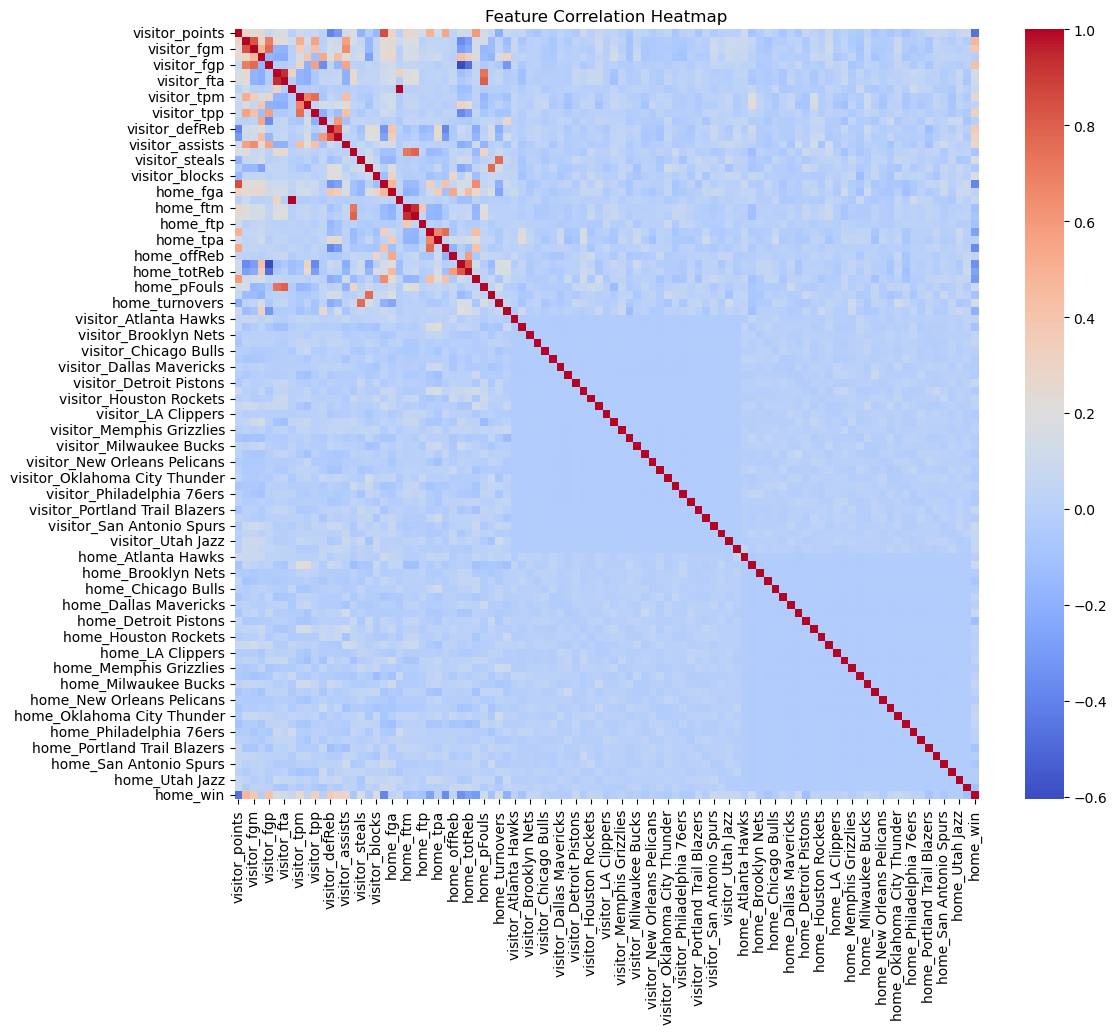

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# # Look for correlation between columns and 'total_points' column
# correlations = target_df.corr(numeric_only=True)[target_column]

# # Set conditions to find feature columns
# feature_columns = correlations[correlations > 0.3]

# # Create new data frame with chosen feature columns
# new_df = target_df[feature_columns.index]
# new_df

,visitor_fgm,visitor_fgp,visitor_tpp,visitor_defReb,home_win
0,51,0.560,0.441,37,1
1,43,0.439,0.378,31,0
2,44,0.468,0.429,33,0
3,46,0.529,0.500,29,1
4,51,0.490,0.341,36,1
...,...,...,...,...,...
2490,42,0.467,0.242,24,0
2491,44,0.478,0.314,39,1
2492,35,0.461,0.395,35,1
2493,43,0.489,0.233,30,0


# Model

In [311]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

scaler = MinMaxScaler()

X = scaler.fit_transform(encoded_df.drop(columns=['home_win', 'home_points', 'visitor_points']))

X_df = pd.DataFrame(X, columns=encoded_df.drop(columns=['home_win', 'home_points', 'visitor_points']).columns)

y = encoded_df['home_win']

# Splitting into testing/train data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Create decision tree regression instance
model = DecisionTreeClassifier()

# Fit model
model = model.fit(X_train, y_train)

# Making predictions using scaled data
predictions = model.predict(X_test)

# Print predicted price for tested features
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [312]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.7895791583166333
Confusion Matrix:
 [[163  56]
 [ 49 231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       219
           1       0.80      0.82      0.81       280

    accuracy                           0.79       499
   macro avg       0.79      0.78      0.79       499
weighted avg       0.79      0.79      0.79       499



In [308]:
# # Define the home and visitor teams
home_team = input("Enter Away Team: ")  # Replace with desired home team
visitor_team = input("Enter Home Team: ")  # Replace with desired visitor team

# Create a new data instance with zeros for all one-hot columns
input_data = {col: 0 for col in X_df.columns}
input_data[f'home_{home_team}'] = 1
input_data[f'visitor_{visitor_team}'] = 1

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Apply the same MinMaxScaler used on X_df
input_scaled = scaler.transform(input_df)

# Predict total points
predicted_winner = model.predict(input_scaled)[0]

winning_team = home_team if  predicted_winner == 1 else visitor_team
print("Predicted Winner:", winning_team)

Predicted Winner: Los Angeles Lakers


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Machine Learning Model 3 Version 1.2